In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

1)Carga conjunto de datos MNIST con las imagenes de digitos escritas a mano y sus etiquetas

2)Se hace un redimensionado

2.1) 60000 es la cantidad de imagenes en el conjunto de entrenamiento

2.2) 28,28 son las dimensiones de cada imagen en pixel

2.3) 1 es escala de grises

2.4)astype('float32') convierte valores de pixeles a numeros flotantes de 32 bits

2.5) /255 normaliza los valores dividiendo todo entre 255, el cual es su maximo

3) to_categorical convierte las etiquetas en formato de vector binario [0,0,0,1,0,...,0]

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #85% train, 15% test
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Muestra del DataSet

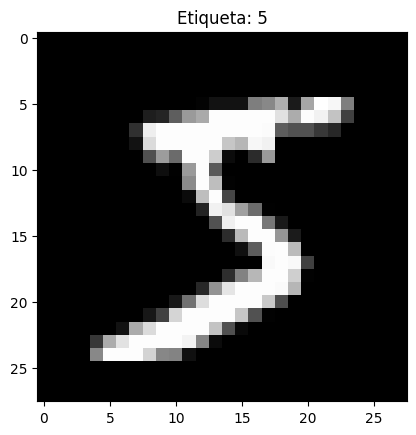

In [3]:


# Imprimir una imagen y su etiqueta del conjunto de entrenamiento
sample_index = 0  # Puedes cambiar este índice para ver diferentes ejemplos
plt.imshow(train_images[sample_index],cmap='gray')
plt.title(f'Etiqueta: {train_labels[sample_index].argmax()}')
plt.show()



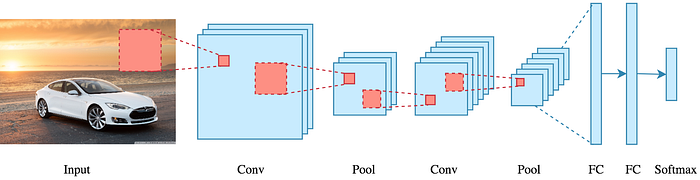

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


750/750 [==============================] - 21s 23ms/step - loss: 0.2055 - accuracy: 0.9366 - val_loss: 0.0836 - val_accuracy: 0.9748
Epoch 2/5
750/750 [==============================] - 17s 23ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0458 - val_accuracy: 0.9860
Epoch 3/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0522 - val_accuracy: 0.9844
Epoch 4/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0479 - val_accuracy: 0.9872
Epoch 5/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0489 - val_accuracy: 0.9866


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy en datos de prueba: {test_acc}')


313/313 [==============================] - 3s 11ms/step - loss: 0.0394 - accuracy: 0.9875
Accuracy en datos de prueba: 0.987500011920929


In [9]:
# Supongamos que tienes una imagen específica (puedes cargarla o generarla)
# Aquí usamos la primera imagen del conjunto de prueba como ejemplo
input_image = test_images[0].reshape(1, 28, 28, 1)

# Realizar la predicción
prediction = model.predict(input_image)

# Obtener el índice de la clase predicha
predicted_class = np.argmax(prediction)


1/1 [==============================] - 0s 274ms/step


In [10]:
print(f"La red neuronal predice que la imagen es un '{predicted_class}' con probabilidad {prediction[0][predicted_class]:.2f}")

La red neuronal predice que la imagen es un '7' con probabilidad 1.00


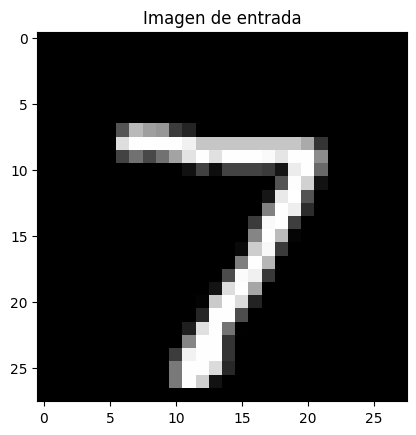

In [11]:
input_image_resize = input_image.reshape(28, 28)
plt.imshow(input_image_resize, cmap='gray')
plt.title('Imagen de entrada')
plt.show()
